In [1]:
import numpy as np
import scipy
from scipy import special
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.style.use('seaborn-pastel')
import time

<IPython.core.display.Javascript object>


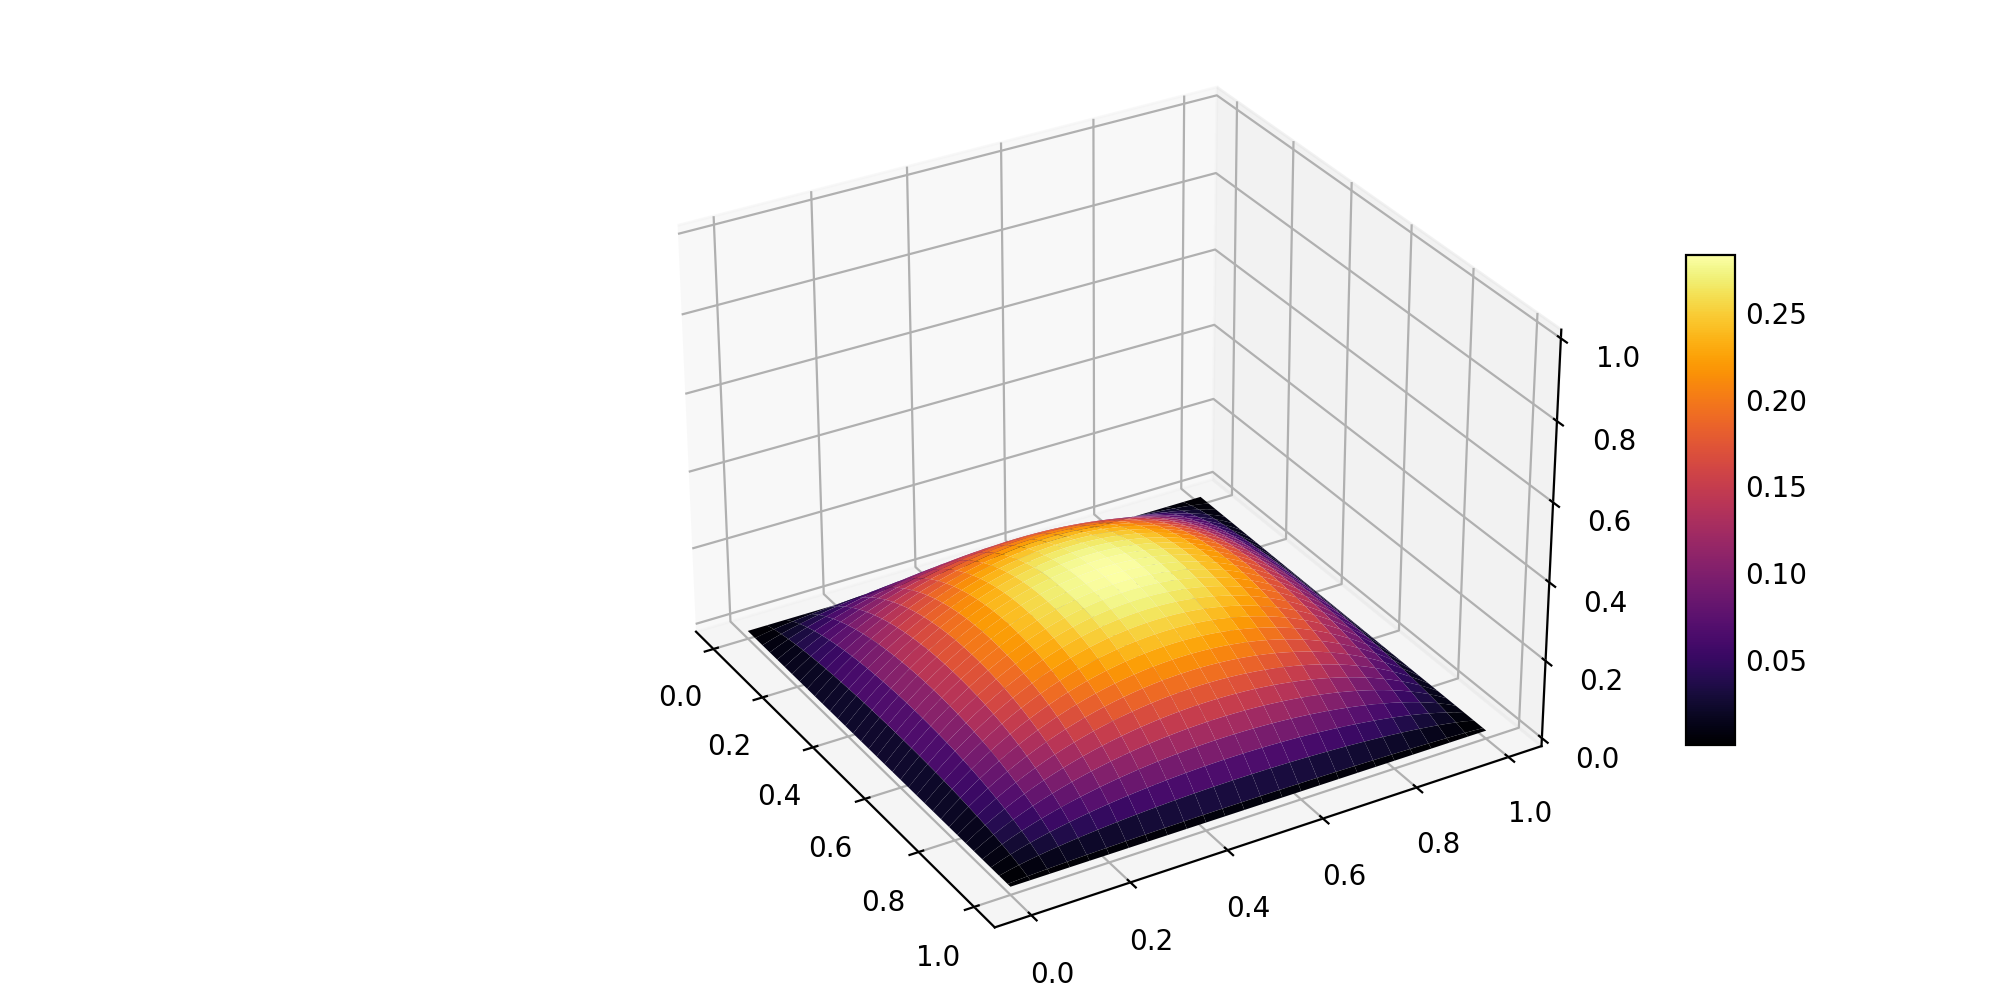

In [2]:
#общая задача
L_x = 1
L_y = 1
delta = 100
N = 50
M = 100
h_x = L_x / N
h_y = L_y / M
u = np.zeros([N+1, M+1])
f = np.zeros([N+1, M+1])
x_i = np.arange(0, L_x+h_x, h_x)
y_j = np.arange(0, L_y+h_y, h_y)

for i in range(N+1):
    for j in range(M+1):
        f[i][j] = 100*np.exp(-((x_i[i] - L_x/2)**2 + (y_j[j] - L_y/2)**2 / delta**2))
F = np.zeros([N+1, M])
for m in range(1, M):
    for i in range(N+1):
        for j in range(1,M):
            F[i][m] += 2 / M *(f[i][j]*np.sin(np.pi*m*j/M))
Fi = np.zeros([N, M])
V = np.zeros([N, M])
for m in range(1, M):
    for l in range(1, N):
        for i in range(1, N):
            Fi[l][m] += 2 / N * F[i][m] * np.sin(np.pi * l * i / N)
for l in range(1, N):
    for m in range(1, M):
        V[l][m] = Fi[l][m] / (4*np.sin(np.pi * l/(2*N))**2 / h_x**2 + 4*np.sin(np.pi * m/(2*M))**2 / h_y**2)
U = np.zeros([N+1, M])
for i in range(N+1):
    for m in range(1, M):
        for l in range(1,N):
            U[i][m] += 2 / N * V[l][m] * np.sin(np.pi * l * i / N)
for i in range(N+1):
    for m in range(1, M):
        for j in range(1,M):
            u[i][j] += U[i][m] * np.sin(np.pi * m * j / M)

plt.style.use('_mpl-gallery')
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(projection='3d')
axes.set_zlim(0, 1)
#ax_3d = Axes3D(fig)
xgrid, ygrid = np.meshgrid(y_j, x_i)
surf = axes.plot_surface(xgrid, ygrid, u, cmap='inferno')
#axes.set_zlim(0, 100)
plt.rcParams['axes.grid'] = False
fig.colorbar(surf, shrink = 0.5, aspect = 10)
plt.show() 

<IPython.core.display.Javascript object>


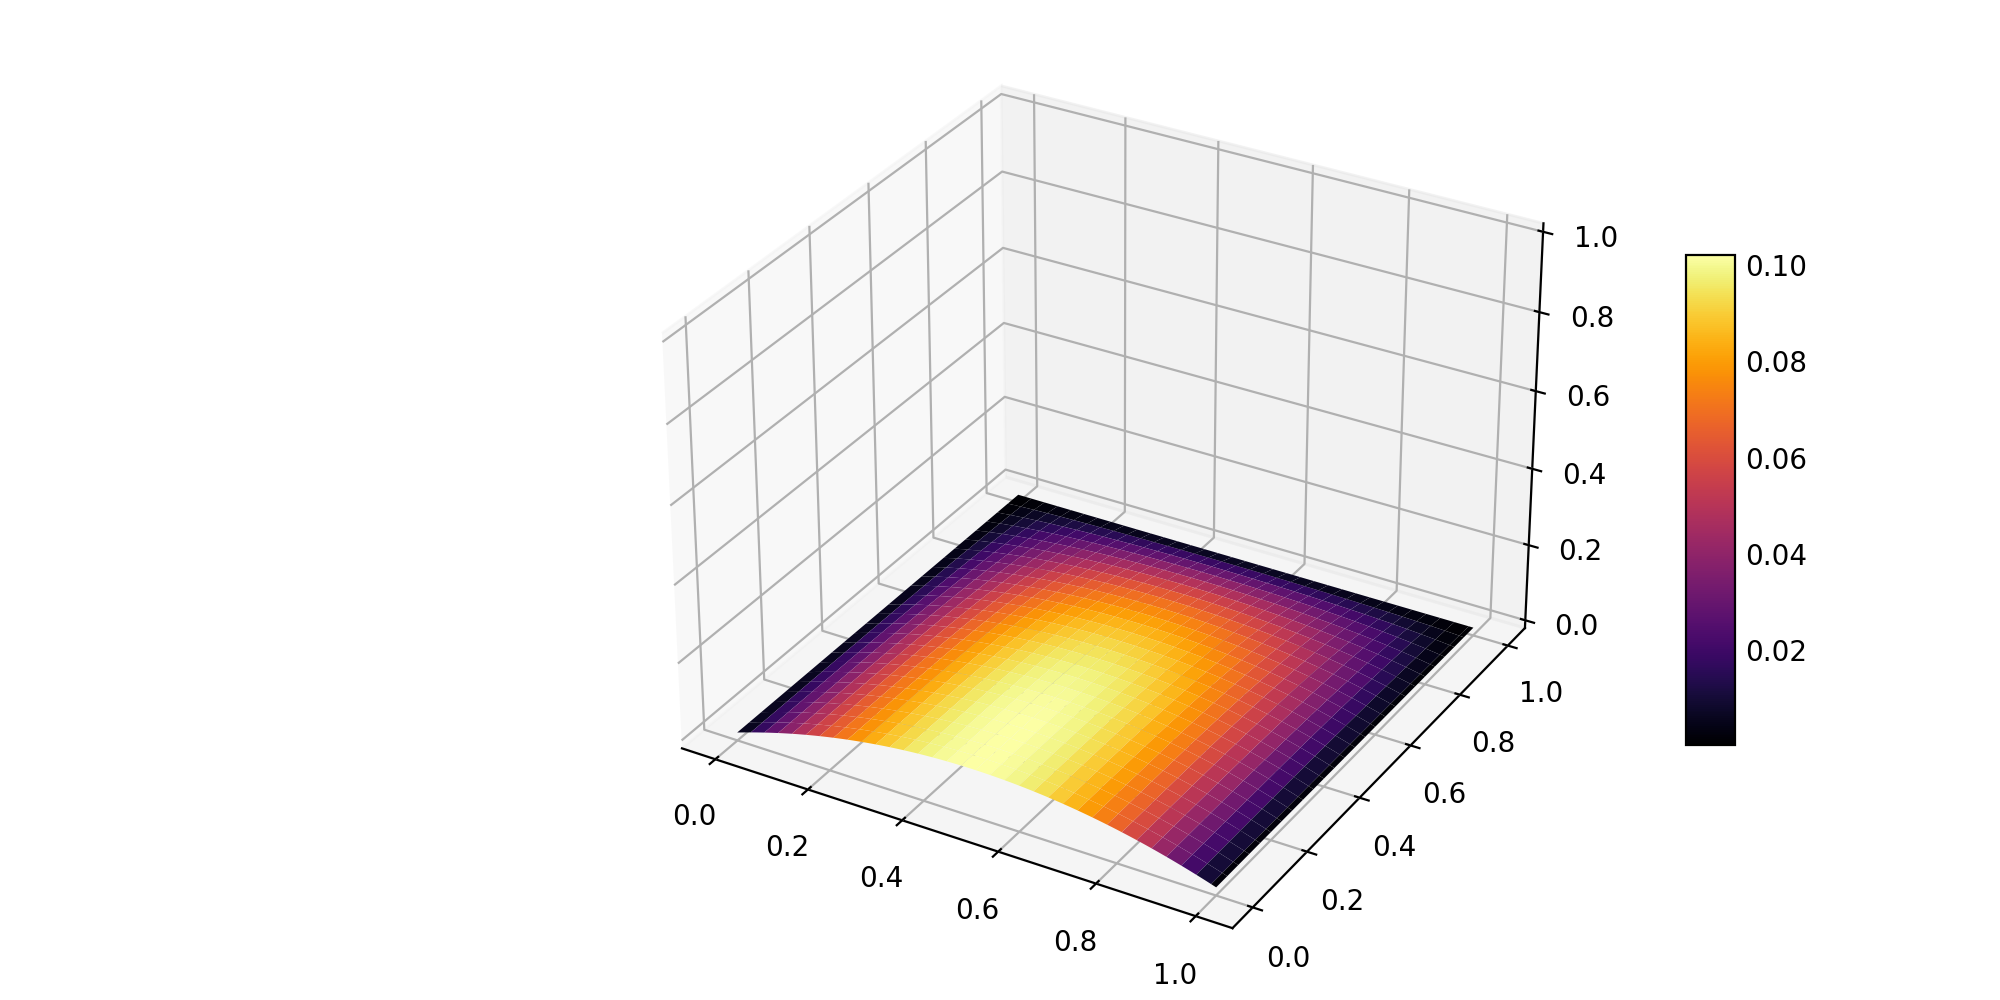

In [3]:
# задача Б
L_x = 1
L_y = 1
delta = 100
N = 50
M = 100
h_x = L_x / N
h_y = L_y / M
u = np.zeros([N+1, M+1])
f = np.zeros([N+1, M+1])
x_i = np.arange(0, L_x+h_x, h_x)
y_j = np.arange(0, L_y+h_y, h_y)

for i in range(N+1):
    for j in range(M+1):
        f[i][j] = np.exp(-((x_i[i] - L_x/2)**2 + (y_j[j] - L_y/2)**2 / delta**2))
F = np.zeros([N+1, M])
for m in range(1, M):
    for i in range(N+1):
        for j in range(1,M):
            F[i][m] += 2 / M *(f[i][j]*np.sin(np.pi*m*j/M))
A = C = -1/h_x**2
alph = np.zeros(N)
beta = np.zeros(N)
alph[0] = 1
beta[0] = 0
U = np.zeros([N+1, M])
U[N] = 0
for m in range(M):
    B = 2 / h_x**2 + 4*np.sin(np.pi*m/(2*M))**2 / h_y**2
    for i in range(N-1):
        alph[i+1] = -C/(A * alph[i] + B)
        beta[i+1] = (F[i][m] - A*beta[i]) / (A*alph[i] + B)
    for i in range(N-1, -1, -1):
        U[i][m] = alph[i]*U[i+1][m] + beta[i]
for i in range(N+1):
    for m in range(1, M):
        for j in range(1,M):
            u[i][j] += U[i][m] * np.sin(np.pi * m * j / M)
plt.style.use('_mpl-gallery')
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(projection='3d')
axes.set_zlim(0, 1)
#ax_3d = Axes3D(fig)
xgrid, ygrid = np.meshgrid(y_j, x_i)
surf = axes.plot_surface(xgrid, ygrid, u, cmap='inferno')
#axes.set_zlim(0, 100)
plt.rcParams['axes.grid'] = False
fig.colorbar(surf, shrink = 0.5, aspect = 10)
plt.show() 